# INFO 2950 Homework 5



In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay

import seaborn as sns
import matplotlib.pyplot as plt

## Part 1: predict diamond prices

This problem is based on an example in *R for Data Science* by Wickham and Grolemund. The file `diamonds.csv` contains measurements of the size, quality, and price of diamonds. Can we predict the price based on different attributes?

### Q1. Import data (2 points)

Create a DataFrame using `pandas` from the CSV file. Display the first five rows using the `head()` function.

In [2]:
diamonds_df = pd.read_csv("diamonds.csv")
diamonds_df.head(n=5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Q2. Coding observations as numbers (5 points)

Linear regression assumes that the input values are numbers, but the values for several attributes are strings. Use the `map()` function to replace these string values to numeric values. In class we used a function, but you can also just pass a dictionary with substitutions. I'm including three dictionaries with appropriate values for the fields you need to convert. Display the first five rows after the transformation.

In [3]:
# These dictionaries map strings to numeric values for three
# categories of diamond quality. Larger numbers are associated
# with higher quality.

cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
color_map = {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}
clarity_map = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}


In [4]:
diamonds_df["cut"] = diamonds_df["cut"].map(cut_map)

diamonds_df["color"] = diamonds_df["color"].map(color_map) 

diamonds_df["clarity"] = diamonds_df["clarity"].map(clarity_map) 


(diamonds_df.head(n=5)) 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


### Q3: Train/test split (5 points)

Use the function `train_test_split` to create two new dataframes, `diamonds_train` and `diamonds_test`, with testing proportion 10% and random state 2950 (setting the random seed will ensure that the TAs can check your outputs quickly).

Print the shape of the two arrays and the first row of the training set. **Confidence check:** the first row of the train data should have index 3651.

Note: in the slides we split two arrays (`X` and `y`) simultaneously, you  can also split just one.

In [5]:
diamonds_train, diamonds_test = train_test_split(diamonds_df, test_size = 0.1, random_state = 2950) 

In [6]:
#diamonds_train.iloc[2]

print(diamonds_train.shape)
print(diamonds_test.shape)
print(diamonds_train.head(1))

(48546, 10)
(5394, 10)
      carat  cut  color  clarity  depth  table  price     x     y     z
3651   0.73    5      2        4   60.8   56.0   3438  5.82  5.85  3.55


### Q4: Single regressions (15 points)

Create a function `run_regression` that takes four arguments:
* a **list** of variable name strings
* a training  set
* a testing set
* the name of the predicted target variable

In the function, create a `LinearRegression` model and fit it with the training data. Then generate predictions for the training data and the test data. Use `numpy` functions to calculate the mean squared error between predicted price and actual price. Finally print the list of variables, the coefficients and intercept from the model, the train and test RMSE, and the train and test MAE.

Iterate through list of variables names, `carat`, `cut`, `color`, and `clarity`, and generate training and test predictions for each variable with your `run_regression` function. 

In  the markdown cell below, for each of the four models discuss the interpretation of the parameters (intercept and coefficients). Then state whether the sign of the slope parameters matches your expectations, and why or why not.

Finally, plot the regression line with a confidence interval for the input `carat` and output `price`. Describe in your own words what the CI tells you.

In [7]:

def run_regression(var_list, train, test, tar_var):
    
    #xtrain = np.array(train[var_list]).reshape(-1, 1)
    xtrain = np.array(train[var_list])
    ytrain = np.array(train[tar_var]) 
    
    #xtest = np.array(test[var_list]).reshape(-1, 1)
    xtest = np.array(test[var_list])
    ytest = np.array(test[tar_var]) 
    
    model= LinearRegression().fit(xtrain, ytrain)
    y_train_prediction = model.predict(xtrain)
    y_test_prediction = model.predict(xtest)
    
    #print list of variables 
    print("variable:")
    print(var_list)
    
    #print coefficient and intercept
    
    print("coefficient:")
    print(model.coef_) 
    
    print("intercept")
    print(model.intercept_)
    
    #print train and test RMSE
    print("train RMSE")
    print((np.square(ytrain - y_train_prediction).mean())**0.5 )
    
    print("test RMSE")
    print((np.square(ytest -y_test_prediction).mean())**0.5)
    
    #print train and test MAE
    print("train MAE")
    print( metrics.mean_absolute_error(ytrain, y_train_prediction))
    
    print ("test MAE") 
    print(metrics.mean_absolute_error(ytest, y_test_prediction))



variable:
['carat']
coefficient:
[7754.59319528]
intercept
-2254.324910815912
train RMSE
1549.0130044812227
test RMSE
1544.2116892066142
train MAE
1008.3951957251111
test MAE
997.3748627257746


variable:
['cut']
coefficient:
[-196.1281576]
intercept
4703.394248802723
train RMSE
3994.378583760071
test RMSE
3886.2547865726347
train MAE
3029.6963453969056
test MAE
2943.789156955115


variable:
['color']
coefficient:
[-404.30984045]
intercept
5719.348163738857
train RMSE
3940.7875416414777
test RMSE
3827.3953722299793
train MAE
2968.1419712674997
test MAE
2870.75168499773


variable:
['clarity']
coefficient:
[-358.15153861]
intercept
5388.035138282368
train RMSE
3956.6970601364324
test RMSE
3850.3058843557774
train MAE
2957.7128041841
test MAE
2863.6061218451364
AxesSubplot(0.125,0.125;0.775x0.755)


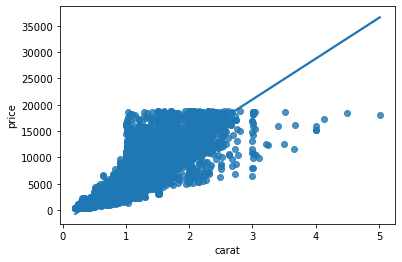

In [8]:
variables_list = ["carat", "cut", "color", "clarity"]

for i in variables_list: 
    print("\n")
    run_regression([i], diamonds_train, diamonds_test, "price") 



print(sns.regplot(x=diamonds_df["carat"], y=diamonds_df["price"], ci=95 )) 

**Discuss the four models here**

The four models I have vary in terms of intercept and coefficient value which is to be expected because different factors will influence the data in different ways. The Cut, Color, and Clarity Coefficients surprised me because I would expect a positive coefficient but instead I saw a negative coefficient for each of these. I would say that this is likely because other factors are influencing the overall result and that's why on these individual variables we see a negative coefficient value. Of course, more than one variable (a combination of variables) in actuality contributes to the price of a diamond, so all of these variables probably interact with each other. 


In the markdown cell below, for each of the four models discuss the interpretation of the parameters (intercept and coefficients). Then state whether the sign of the slope parameters matches your expectations, and why or why not.

['carat']
coefficient:
[7754.59319528]  So I would expect an increase of about $7754.59 for each additional carat, and this coefficient is positive which makes sense to me. 
intercept
-2254.324910815912 -- the price the model expects for a carat of 0. This is not a realistic prediction, but a carat of 0 would not be a diamond so I'm not sure that that is realistic either. \


variable:
['cut']
coefficient:
[-196.1281576]- model expects decrease of 196.13 dollars for each incremental increase in our cut scoring system. Not what I would expect because diamonds with better cuts should cost more. 
intercept
4703.394248802723 for a cut of score 0 the model predicts a price of 4703.39 USD but this is not possible because the lowest score that our model allows for is a 1 and not a 0. 


['color']
coefficient:
[-404.30984045] so out model predicts that for every single step increase in our colour scoring, a decrease of 404.31 dollars in the price but I wouldn't expect this because better-coloured /more highly ranked coloured diamonds should be worth more. 
intercept
5719.348163738857 the model expects for a colour score of 0 a price of 5719.35 USD which is not possible because the lowest score that our model allows for is a 1 and not a 0 


['clarity']
coefficient:
[-358.15153861] this means that our model predicts that for every single step discrete increase in our clarity scoring system, there would be a decrease in the price by 358.15 USD which of course I wouldn't expect because as the rating of clarity goes up, so should the price. 
intercept
5388.035138282368 the model predicts for clarity score 0, a price of 5388.04 USD which is not possible because of how the scoring system works-- the lowest score possible is a 1 and not a 0  



**Describe the CI here**

the confidence interval exists because it is inherent to the regression plot on seaborn but on our chart it is too small to see. Having a small interval aids our certainty, because the small interval means we can be more certain of our model

### Q5. Multiple regression (15 points)

Now call the same function with all four inputs to predict `price`. Describe how the coefficients are or are not different from the individual regressions. If they are different, make an argument about why modeling these variables jointly would result in different relationships than modeling them individually. (**Hint:** think about the relationship between the size of diamonds and their quality, both in terms of geology and markets)

Next, describe the train and test evaluation metrics you got. Should we be concerned about overfitting? Between RMSE and MAE, which metric takes outliers into account more?

Lastly, let's explore bootstrapping. First, make 1000 bootstrapped samples of the full diamonds dataset. Then, train models on each of those samples. Finally, plot the distribution of the coefficient $\beta$ for the `carat` variable. Describe what this distribution tells you, and how it relates to your output in the first part of this question.

variable:
['carat', 'cut', 'color', 'clarity']
coefficient:
[8775.83453445  153.82203811  319.83314131  524.35086914]
intercept
-7201.687163566516
train RMSE
1236.5781546041733
test RMSE
1220.6376811712876
train MAE
856.1542839519135
test MAE
845.0680090353013


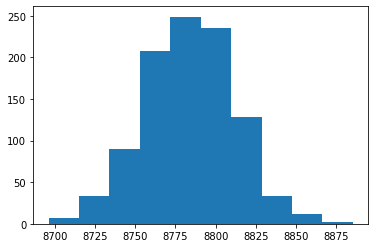

In [9]:
variables_list = ["carat", "cut", "color", "clarity"]

run_regression(variables_list, diamonds_train, diamonds_test, "price")



bs_coef = np.zeros(1000)
for i in range (1000): 
    bs_sample = diamonds_df.sample(n=diamonds_df.shape[0], replace=True)
    model = LinearRegression().fit(bs_sample[["carat", "cut", "color", "clarity"]], bs_sample[["price"]])
    bs_coef[i] = model.coef_[0][0]

plt.hist(bs_coef) 
plt.show() 

**Discuss the multi-input model here**

our multiple input model makes more sense to me because all of the coefficients are positive, which is what I would expect to see. These variables probably interact with each other in more complex ways than the model represents. 
In diamonds carat quality is the biggest determiner of price, and the other factors are often contingent on that. As carat size increases you are less likely to find diamonds with good cut colour and clarity, so there seems to be an inverse relationship between the two. I would say that overall, our multivariable model makes the most sense to me. 

**Discuss the evaluation metrics here**

train RMSE
1236.5781546041733

test RMSE
1220.6376811712876

train MAE
856.1542839519135

test MAE
845.0680090353013


Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) are metrics used for numerical non-binary outputs so we are using it in this situation. And I would say that, according to my online research, "RMSE is more sensitive to outliers than the MAE." the test and train RMSE and MAE are relatively similar but not the same, but I would say overall, these results make sense and are what I would expect.

One of the pros of using a train/test split is "confirmation that you’re not overfitting across variables" according to the class slides

**Describe what the $\beta$ distribution tells you**

it shows the distribution of  $\beta$ based on our bootstrapped samples. So based on our samples, some of the coefficients are higher and some are lower, but they are all centered around the actual  $\beta$ that we have, which is 8775.83453445. The distribution is bell shaped and looks to be fairly normal 

## Part 2: Cars

For the remaining part of the homework we'll be working with a [dataset of information about cars](https://www.kaggle.com/toramky/automobile-dataset) that was compiled in 1985.

In [10]:
cars = pd.read_csv("Automobile_data.csv")
print(cars.shape)
cars.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Q6: Indicator variables (5 points)

We know how to use numerical values as inputs, but many interesting variables are categorical. We'll look at the `body-style` variable:

In [11]:
cars.groupby("body-style")["body-style"].count()

body-style
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: body-style, dtype: int64

There are five distinct values (this was before SUVs were a thing). To use this variable as an input we need to transform it into five variables (one per value) that are 1 if the `body-style` variable has that value, and 0 otherwise. Only one of these new variables will be active for any given car, so this way of encoding categories is sometimes called "one hot". Other terms are "indicator variables" or "dummy variables".

Use the `pd.get_dummies()` function to create a new dataframe called `style_dummies` with five 0/1 variables for the `body-style` categories (you don't need to drop the first). Display the first five rows.

Set the variable `cars` equal to the concatenation of `cars` and `style_dummies` along the rows. Print the shape of the resulting data frame. **Confidence check:** It should be `(205, 31)`.


In [12]:
data = pd.get_dummies(cars["body-style"]) 

style_dummies = pd.DataFrame(data) 

print(style_dummies.head(n=5)) 


cars = pd.concat([cars, style_dummies], axis = 1) 

print(cars.shape)

(cars.head(n=5))

   convertible  hardtop  hatchback  sedan  wagon
0            1        0          0      0      0
1            1        0          0      0      0
2            0        0          1      0      0
3            0        0          0      1      0
4            0        0          0      1      0
(205, 31)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,convertible,hardtop,hatchback,sedan,wagon
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,13495,1,0,0,0,0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000,21,27,16500,1,0,0,0,0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000,19,26,16500,0,0,1,0,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500,24,30,13950,0,0,0,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500,18,22,17450,0,0,0,1,0


### Q7 : Cleaning (5 points)

There are two `?`s in the `horsepower` column, so pandas will interpret the column as a string. Remove the rows with non-numeric values and convert the column to the type `float`. Consult documentation on converting strings to floats.

Display the mean of the `horsepower` variable.

In [27]:

cars = cars[cars["horsepower"] != "?"]

cars = cars.astype({'horsepower':'float'})

print(cars.shape)
print(cars["horsepower"].mean()) 


(203, 32)
104.25615763546799


### Q8 : Transformations (3 points)

Add a new variable called `highway-gphm` to the `cars` data frame that is equal to 100 divided by `highway-mpg`. This is "gallons per hundred miles".

In [14]:


cars["highway-gphm"] = 100/(cars["highway-mpg"]) 

cars.head(n=5) 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,convertible,hardtop,hatchback,sedan,wagon,highway-gphm
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000,21,27,13495,1,0,0,0,0,3.703704
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000,21,27,16500,1,0,0,0,0,3.703704
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000,19,26,16500,0,0,1,0,0,3.846154
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500,24,30,13950,0,0,0,1,0,3.333333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500,18,22,17450,0,0,0,1,0,4.545455


### Q9: Train/test split (5 points)

Create a 80%/20% train/test split with random seed 2022. Save the result to variables `cars_train` and `cars_test`. Display the number of each body style for the test set (in other words, you'll group by the `body-style` value).

In [15]:
cars_train, cars_test = train_test_split(cars, test_size = 0.2, random_state = 2022) 
print(cars_test.groupby("body-style")["body-style"].count()) 



body-style
convertible     2
hardtop         1
hatchback      15
sedan          20
wagon           3
Name: body-style, dtype: int64



### Q10: Logistic regression (15 points)

Create a function `run_logistic_regression` with the same format as the previous function. Instead of RMSE and MAE, we now want to calculate accuracy, precision, recall, and F1. You may use functions from [sklearn metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

This function should return:

*  variable names
* model coefficient and intercept
* train and test accuracy
* train and test precision
* train and test recall
* train and test f1

Then, use this function (once) with multiple input variables, `wheel-base`, `engine-size`, `horsepower`, `highway-mpg`, and with the target `sedan`.

Interpret the resulting regression for the `wheel-base` variable (units are inches). Then, describe the train and test metrics in your own words. Should we be concerned about overfitting?

In [16]:
def run_logistic_regression(var_list, train, test, tar_var):
    
    #xtrain = np.array(train[var_list]).reshape(-1, 1)
    xtrain = np.array(train[var_list])
    ytrain = np.array(train[tar_var]) 
    
    #xtest = np.array(test[var_list]).reshape(-1, 1)
    xtest = np.array(test[var_list])
    ytest = np.array(test[tar_var]) 
    
    model= LogisticRegression().fit(xtrain, ytrain)
    y_train_prediction = model.predict(xtrain)
    y_test_prediction = model.predict(xtest)
    
    
    #print list of variables 
    print("variable:")
    print(var_list)
    print("\n")
    
    #print coefficient and intercept
    print("coefficient:")
    print(model.coef_) 
    
    
    print("intercept")
    print(model.intercept_)
    print("\n")
    
    #print train and test accuracy
    
    print("train accuracy")
    print(metrics.accuracy_score(ytrain, y_train_prediction))
    
    
    print("test accuracy")
    print((metrics.accuracy_score(ytest, y_test_prediction)))
    print("\n")
    
    #print train and test precision     
    print("train precision")      
    print(metrics.precision_score(ytrain, y_train_prediction))      
          
    print("test precision")
    print((metrics.precision_score(ytest, y_test_prediction)))       
    print("\n")
    #print train and test recall 
    
    print("train recall")      
    print(metrics.recall_score(ytrain, y_train_prediction))      
          
    print("test recall")
    print((metrics.recall_score(ytest, y_test_prediction))) 
    print("\n")
    
    #print train and test f1 score 
    print("train f1")      
    print(metrics.f1_score(ytrain, y_train_prediction))      
          
    print("test f1")
    print((metrics.f1_score(ytest, y_test_prediction)))    
    

In [17]:
variables_list = ["wheel-base", "engine-size", "horsepower", "highway-mpg"]

run_logistic_regression(variables_list, cars_train, cars_test, "sedan") 

variable:
['wheel-base', 'engine-size', 'horsepower', 'highway-mpg']


coefficient:
[[0.13651678 0.00226047 0.00089683 0.09267285]]
intercept
[-16.85833264]


train accuracy
0.6296296296296297
test accuracy
0.5853658536585366


train precision
0.6538461538461539
test precision
0.6153846153846154


train recall
0.4473684210526316
test recall
0.4


train f1
0.53125
test f1
0.4848484848484849


**Discuss the wheelbase interpretation here**

for wheelbase discussion, 0.13651678 is the coefficient and it means that as the wheelbase size increases (in inches), the more that the car is likely to be a sedan 

**Discuss the train and test evaluation metrics here**
the train and test evaluation metrics are all relatively similar to each other but I notice higher values for all metrics for the train sets comparted to the test set, which makes sense because we are training on the train set so the train set will likely yield "better" results than the test set. if the train set fared significantly better than our test set there would be a concern about overfitting on the train, but we don't see that so we don't need to worry about that

### Q11 : Checking covariates (15 points)

Using the train set, generate the correlation matrix for the four inputs in the previous regression. Describe what concerns you.

Re-run the logistic regression with three inputs instead of four (dropping one input to avoid multicollinearity). Describe the differences in coefficients between Q10 and Q11. Describe whether dropping this input changes train or test accuracy.

Then, plot the PR (precision-recall) curve on your test set using the `PrecisionRecallDisplay` function. Describe what the PR curve tells you.


In [18]:
print(cars_train[variables_list].corr() ) 



             wheel-base  engine-size  horsepower  highway-mpg
wheel-base     1.000000     0.516773    0.310855    -0.505632
engine-size    0.516773     1.000000    0.820804    -0.687502
horsepower     0.310855     0.820804    1.000000    -0.760193
highway-mpg   -0.505632    -0.687502   -0.760193     1.000000


**Describe what concerns you.**

I'm concerned because the other variables are all correlated with each other as well, and we are failing to capture these interactions by the model. For example, horsepower and engine size are highly correlated, but our model doesn't necessarily take that into account, because we haven't modelled this interaction or defined an interaction variable.

In [19]:
variables_list = ["wheel-base", "horsepower", "highway-mpg"]

run_logistic_regression(variables_list, cars_train, cars_test, "sedan") 

variable:
['wheel-base', 'horsepower', 'highway-mpg']


coefficient:
[[0.14131562 0.00257741 0.09306028]]
intercept
[-17.23268976]


train accuracy
0.6234567901234568
test accuracy
0.6097560975609756


train precision
0.6470588235294118
test precision
0.6428571428571429


train recall
0.4342105263157895
test recall
0.45


train f1
0.5196850393700788
test f1
0.5294117647058824


**Discuss coefficient differences here**
there is a difference in all of the coefficients which probably has something to do with the deletion of engine size from my model. I would say that the biggest difference in was in the horsepower variable's coefficient, and the other differenced were pretty minimal. I think that this says something about the multicollinearity between horsepower and engine size. 


**Discuss whether dropping the input changes train or test accuracy here**
dropping the input increased both accuracies by a little bit, so I think this means we are on the right track! 

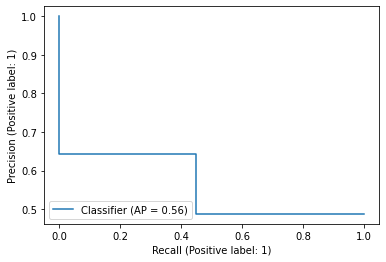

In [26]:
model = LogisticRegression().fit(cars_train[variables_list], cars_train["sedan"])
result = model.predict(cars_test[variables_list])
plot= PrecisionRecallDisplay.from_predictions(cars_test['sedan'],result)




# precision, recall, _ = precision_recall_curve(y_test, predictions)
# disp = PrecisionRecallDisplay(precision=precision, recall=recall)
# disp.plot()
# plt.show()


**Describe the PR curve here**

We are modelling two variables that are binary so in terms of recall and precidison we see the "step"-like structure of the curve. There is a trade-off between precision and recall, that manifests itself in the negative/inverse relationship between the two. 


### Q12 : Cross-Validating (10 points)

Now we'll perform cross validation on the full cars dataframe, instead of using the train/test split that we did before.  Use `KFold` to make 3 splits that are not randomly shuffled (i.e., shuffle=False so no random seed is needed).

Use the `cross_val_score` function to print the F1 score on the logistic regression from Q11 for each of the 3 splits.

Then, calculate the average F1 score across splits, and the standard deviation of the F1 score across splits.

Finally, discuss the differences between this F1 score and the F1 score you got in Q11. Which F1 score do you trust more, and why?

In [31]:
 X = ["wheel-base", "horsepower", "highway-mpg"]


tmp = cross_val_score(estimator = LogisticRegression(), X = cars[X], y = cars['sedan'],\
                       scoring = 'f1', cv = KFold(n_splits = 3, shuffle = False, random_state = None))

print(tmp.mean()) #compare to test f1
print(tmp.std())
print(tmp) 


0.48250747499742247
0.08689554958792134
[0.37735849 0.48       0.59016393]


**Discuss F1 score differences here**

The fscore in 11 is better than the fscore in 10 because it is higher, and the fscore we have here is even higher. I trust this fscore more because of how we derived it (train/validate/test) and not just (train/test). 